# LGMVIP - Data Science Intern, April-2022

### AUTHOR - Karan Doke

## Advanced Level Task

## TASK 7 - Develop A Neural Network That Can Read Handwriting :
Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

#### Dataset link : https://en.wikipedia.org/wiki/MNIST_database

### Importing Libraries

In [2]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading dataset

In [7]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

### Displaying some images

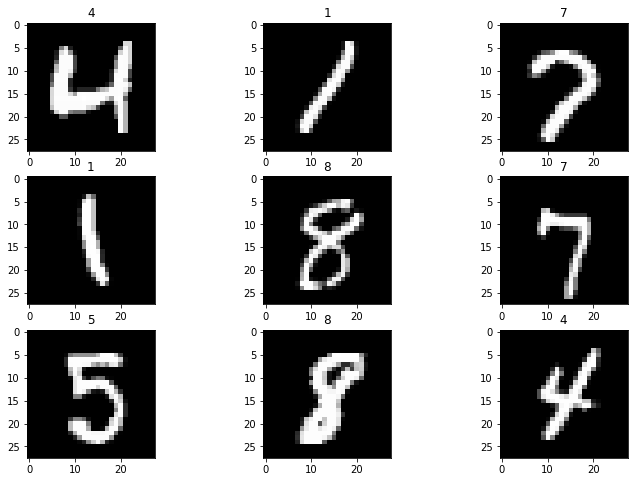

In [11]:
plt.figure(figsize=(12, 8))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

### Plotting count plot

<AxesSubplot:ylabel='count'>

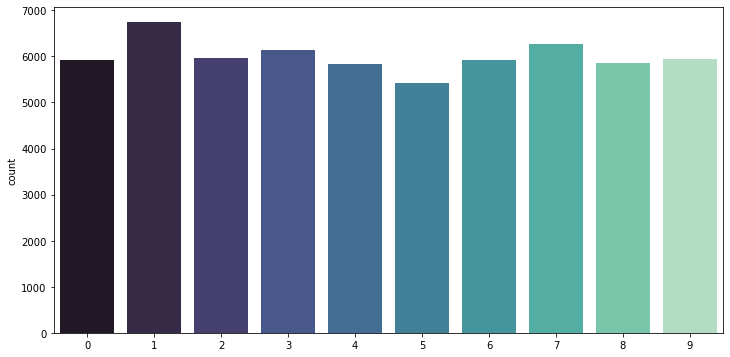

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(y_train,palette="mako")

### Pre-processing the data

In [20]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [21]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [22]:
# Applying Normalization
x_train=x_train/255.0
x_test=x_test/255.0
num_classes = 10

## Creating the model
### Model Architecture
We will have to first build the model architecture and define it based on our dataset. We are going to add the following layers:

1. Conv2D - for the convolution layers
2. Dropout - to prevent overfitting
3. Dense - a fully connected layer
4. Softmax activation - This is used to convert all predictions into probability
The model architecture can be tuned to get optimal performance

so i am goimg to create a model with

#### CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [24]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

### Training the model

In [26]:
# Train the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 600s 354ms/step - loss: 0.2831 - accuracy: 0.9182 - val_loss: 0.1037 - val_accuracy: 0.9750
Epoch 2/10
1688/1688 [==============================] - 561s 332ms/step - loss: 0.1148 - accuracy: 0.9674 - val_loss: 0.0690 - val_accuracy: 0.9852
Epoch 3/10
1688/1688 [==============================] - 559s 331ms/step - loss: 0.0899 - accuracy: 0.9746 - val_loss: 0.0971 - val_accuracy: 0.9837
Epoch 4/10
1688/1688 [==============================] - 563s 334ms/step - loss: 0.0737 - accuracy: 0.9785 - val_loss: 0.1303 - val_accuracy: 0.9805
Epoch 5/10
1688/1688 [==============================] - 552s 327ms/step - loss: 0.0687 - accuracy: 0.9805 - val_loss: 0.0767 - val_accuracy: 0.9872
Epoch 6/10
1688/1688 [==============================] - 553s 328ms/step - loss: 0.0578 - accuracy: 0.9831 - val_loss: 0.1576 - val_accuracy: 0.9802
Epoch 7/10
1688/1688 [==============================] - 546s 323ms/step - loss: 0.0561 - accuracy: 0.9840 - val_

### Saving and loading the model

In [27]:
model.save('MNproject.h5')

In [39]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

### Evaluating the model

In [40]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 14s 45ms/step - loss: 0.0922 - accuracy: 0.9841
Test Loss 0.09223803877830505
Test Accuracy 0.9840999841690063


## Plotting Training & Validation plots

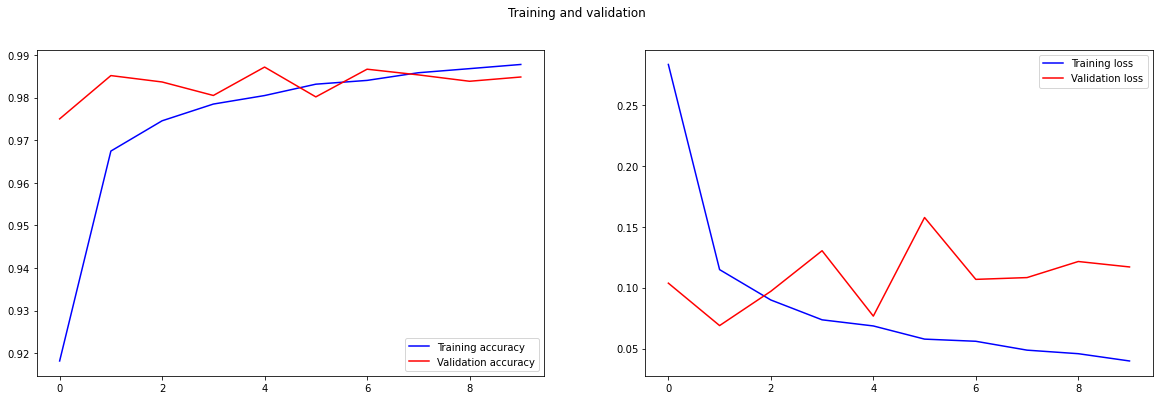

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'b', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'b', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [42]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    2,    1,    0,    1],
       [   0, 1129,    1,    2,    0,    2,    0,    1,    0,    0],
       [   3,   10, 1006,    0,    0,    0,    1,   12,    0,    0],
       [   0,    0,    1, 1001,    0,    2,    0,    4,    1,    1],
       [   1,   23,    0,    0,  932,    0,    1,    4,    0,   21],
       [   1,    1,    0,    8,    0,  878,    3,    0,    0,    1],
       [   3,    4,    0,    0,    1,    3,  947,    0,    0,    0],
       [   0,    3,    0,    0,    0,    0,    0, 1025,    0,    0],
       [   6,    1,    2,    1,    0,    1,    1,    5,  948,    9],
       [   0,    1,    0,    0,    2,    3,    0,    4,    0,  999]])>

### Plotting heat map

Text(105.0, 0.5, 'Truth')

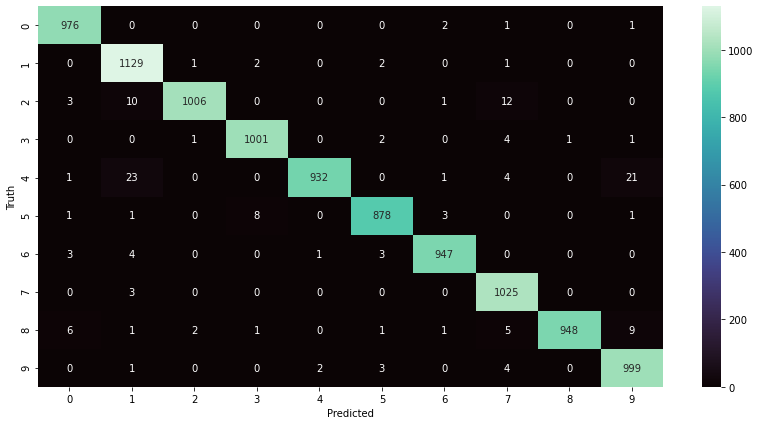

In [47]:
plt.figure(figsize = (14,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'mako')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing the Model

Predicted Value:  6
Successful prediction


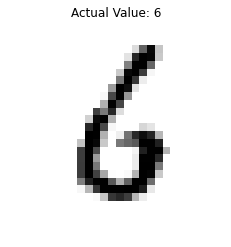

In [46]:
# Testing the Model
plt.imshow(x_test[50],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[50]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[50]))
if(y_test[50]==(np.argmax(prediction[50]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

Predicted Value:  9
Successful prediction


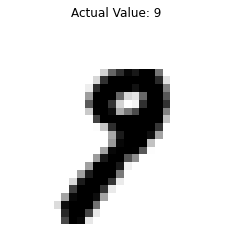

In [49]:
plt.imshow(x_test[73],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[73]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[73]))
if(y_test[73]==(np.argmax(prediction[73]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

# THANK YOU !!!!!!